# Project 2 - EN.605.662
## Due September 28
## Nathan McIntosh
---
Explore and analyze the data using Excel, Google Spreadsheets, R, Python, Matlab, Tableau, or simply by hand (drawing pictures or equations is fine).  What are the characteristics of the data?  Describe each of the data elements and list their category (nominal, ordinal, quantitative, etc...)

This notebook is where the data processing will go.

In [1]:
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

%matplotlib inline

In [2]:
data = pd.read_csv(
    "Salaries.csv", 
    dtype={"JobTitle":"category", "Status":"category", "Agency":"category"}, 
    na_values="Not Provided",
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Id                148654 non-null  int64   
 1   EmployeeName      148652 non-null  object  
 2   JobTitle          148654 non-null  category
 3   BasePay           148045 non-null  float64 
 4   OvertimePay       148650 non-null  float64 
 5   OtherPay          148650 non-null  float64 
 6   Benefits          112491 non-null  float64 
 7   TotalPay          148654 non-null  float64 
 8   TotalPayBenefits  148654 non-null  float64 
 9   Year              148654 non-null  int64   
 10  Notes             0 non-null       float64 
 11  Agency            148654 non-null  category
 12  Status            38119 non-null   category
dtypes: category(3), float64(7), int64(2), object(1)
memory usage: 12.0+ MB


Let's go through each of the columns and examine it in turn

---
### ID
This is an integer. Each employee has a unique ID number. The data is stored in a quantitative data type, but it represents nominal data (each employee gets their own ID number)

<AxesSubplot:>

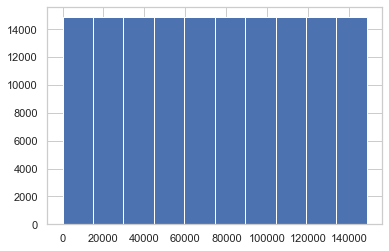

In [3]:
data.Id.hist()

As we can see, the IDs are distributed evenly across all the employees. 

---
### EmployeeName
EmployeeName is a nominal data type. I would expect that most names are seen at most once or twice, and a few many times

In [26]:
data.EmployeeName.describe()

count        148652
unique       110810
top       Kevin Lee
freq             13
Name: EmployeeName, dtype: object

In [27]:
data.EmployeeName.value_counts().head(20)

Kevin Lee            13
William Wong         11
Steven Lee           11
Richard Lee          11
Michael Wong          9
Stanley Lee           9
KEVIN LEE             9
John Chan             9
DAVID WONG            8
William Lee           8
David Wong            8
RICHARD LEE           8
MICHAEL LEE           8
Victor Lee            8
Michael A Johnson     7
MICHAEL BROWN         7
Michael Brown         7
WILLIAM WONG          7
Michael Lee           7
John Miller           7
Name: EmployeeName, dtype: int64

There is clearly some inconsistency in how names are stored: some are all upper case, some just have first letter upper-cased. Let's make it all upper case and see if anythign changes

In [19]:
data.EmployeeName.str.upper().value_counts().head(20)

KEVIN LEE        22
RICHARD LEE      19
STEVEN LEE       18
WILLIAM WONG     18
STANLEY LEE      16
DAVID WONG       16
MICHAEL LEE      15
JOHN CHAN        15
MICHAEL WONG     14
MICHAEL BROWN    14
WILLIAM LEE      14
VICTOR LEE       12
VINCENT WONG     11
SANDY WONG       11
JOHN MILLER      11
ALAN WONG        11
JOHN LEE         11
JUAN GARCIA      10
THOMAS SMITH     10
LINDA LEE        10
Name: EmployeeName, dtype: int64

How often do each of the values appear?

<AxesSubplot:xlabel='same_name'>

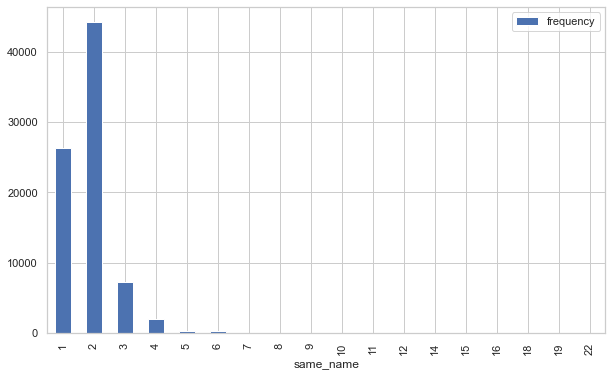

In [40]:
(
    data
    .EmployeeName
    .str.upper()
    .value_counts()
    .value_counts(sort=False)
    .reset_index()
    .rename(columns = {"index":"same_name", "EmployeeName":"frequency"})
    .plot.bar(x = "same_name", figsize = (10,6), )
)

Looks like there are more names that occur twice than there are names that occur once! This distribution also seems to drop off quite rapidly

---
### JobTitle

---
### BasePay

---
### OvertimePay

---
### OtherPay

---
### Benefits

---
### TotalPay

---
### TotalPayBenefits

---
### Year

---
### Notes

---
### Agency

---
### Status